<a href="https://colab.research.google.com/github/anonyme56/ProjetProgrammationDiabete/blob/main/TP_Prog_indian_diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédiction du Diabète - Pipeline de Data Science Complet

## Projet d'Examen - Mini Pipeline de Bout en Bout

**Auteur:** Yohan, Ilias, Chanesse, Aro  

**Date:** Janvier 2026  
**Dataset:** [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
**Type de problème:** Classification

---

### Objectif
Prédire si une patiente a le diabète (1) ou non (0) sur la base de mesures diagnostiques médicales.

### Plan du Notebook
1. Acquisition des données
2. Compréhension des données
3. Nettoyage & Prétraitement
4. Analyse Exploratoire des Données (EDA)
5. Modélisation (3+ modèles)
6. Explication des Modèles
7. Optimisation des Hyperparamètres
8. Évaluation & Sélection du Modèle
9. Conclusion & Reproductibilité

In [164]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [165]:
# Import des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Configuration
warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Constante pour la reproductibilité
RANDOM_STATE = 42

print("Bibliothèques importées avec succès")
print(f"- NumPy version: {np.__version__}")
print(f"- Pandas version: {pd.__version__}")
print(f"- Matplotlib version: {plt.matplotlib.__version__}")
print(f"- Seaborn version: {sns.__version__}")

Bibliothèques importées avec succès
- NumPy version: 2.0.2
- Pandas version: 2.2.2
- Matplotlib version: 3.10.0
- Seaborn version: 0.13.2


In [166]:
# Chargement du dataset
# Le fichier CSV se trouve dans le dossier téléchargé
csv_file = os.path.join(path, 'diabetes.csv')

df = pd.read_csv(csv_file)

print(f"Dataset chargé avec succès depuis: {csv_file}")
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes\n")

# Aperçu des premières lignes
df.head(10)

Dataset chargé avec succès depuis: /kaggle/input/pima-indians-diabetes-database/diabetes.csv
Dimensions: 768 lignes × 9 colonnes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 2. Compréhension des Données

### Description des Variables

Le dataset contient **8 variables explicatives** (features) et **1 variable cible** (target):

**Variables Explicatives:**
1. **Pregnancies**: Nombre de grossesses
2. **Glucose**: Concentration de glucose plasmatique à 2 heures dans un test de tolérance au glucose oral
3. **BloodPressure**: Pression artérielle diastolique (mm Hg)
4. **SkinThickness**: Épaisseur du pli cutané du triceps (mm)
5. **Insulin**: Insuline sérique à 2 heures (mu U/ml)
6. **BMI**: Indice de masse corporelle (poids en kg/(taille en m)^2)
7. **DiabetesPedigreeFunction**: Fonction de pedigree du diabète (probabilité de diabète basée sur les antécédents familiaux)
8. **Age**: Âge (années)

**Variable Cible:**
- **Outcome**: 0 = Pas de diabète, 1 = Diabète

In [167]:
# Informations générales sur le dataset
print("="*80)
print("INFORMATIONS GÉNÉRALES SUR LE DATASET")
print("="*80)
df.info()

print("\n" + "="*80)
print("STATISTIQUES DESCRIPTIVES")
print("="*80)
display(df.describe().T.round(2))

print("\n" + "="*80)
print("TYPES DE DONNÉES")
print("="*80)
print(df.dtypes)

INFORMATIONS GÉNÉRALES SUR LE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

STATISTIQUES DESCRIPTIVES


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00



TYPES DE DONNÉES
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [168]:
# Analyse des valeurs manquantes
print("="*80)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*80)

missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs_Manquantes': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print(missing_data)
print(f"\n✓ Aucune valeur manquante détectée explicitement (NaN)")

# Cependant, vérification des valeurs impossibles (0 pour certaines variables)
print("\n" + "="*80)
print("DÉTECTION DES VALEURS IMPOSSIBLES (0 pour variables biologiques)")
print("="*80)

# Ces variables ne peuvent pas physiologiquement être à 0
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df) * 100)
    print(f"{col:20} : {zero_count:3} valeurs à 0 ({zero_pct:.2f}%)")

print("\n Ces 0 sont probablement des valeurs manquantes non étiquetées!")

ANALYSE DES VALEURS MANQUANTES
                                           Colonne  Valeurs_Manquantes  \
Pregnancies                            Pregnancies                   0   
Glucose                                    Glucose                   0   
BloodPressure                        BloodPressure                   0   
SkinThickness                        SkinThickness                   0   
Insulin                                    Insulin                   0   
BMI                                            BMI                   0   
DiabetesPedigreeFunction  DiabetesPedigreeFunction                   0   
Age                                            Age                   0   
Outcome                                    Outcome                   0   

                          Pourcentage  
Pregnancies                       0.0  
Glucose                           0.0  
BloodPressure                     0.0  
SkinThickness                     0.0  
Insulin                     

DISTRIBUTION DE LA VARIABLE CIBLE (Outcome)

Classe 0 (Pas de diabète): 500 (65.10%)
Classe 1 (Diabète)       : 268 (34.90%)


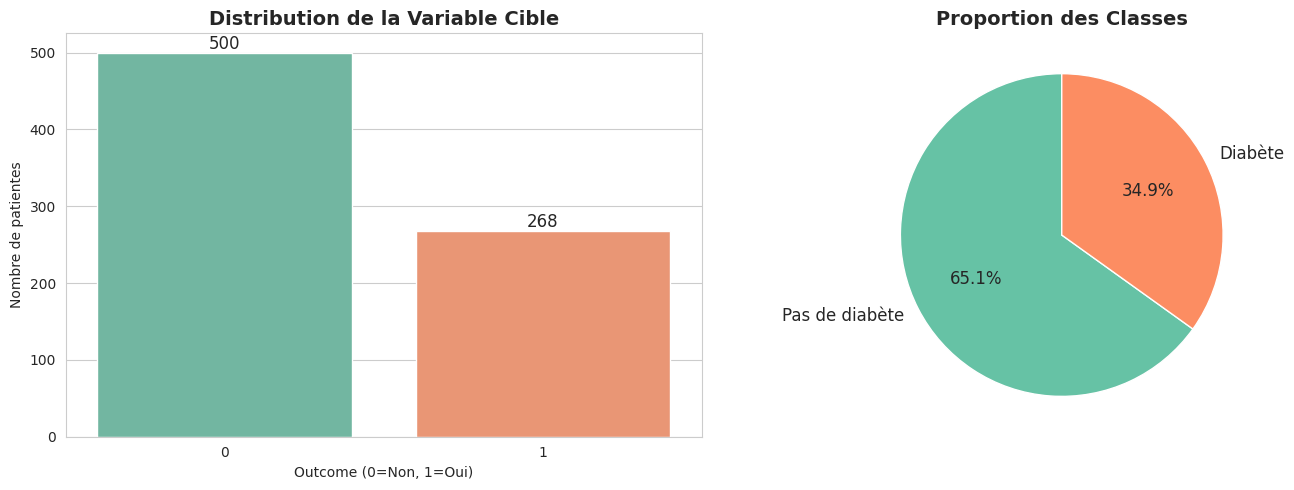


Le dataset est légèrement déséquilibré avec une classe de 65.1%  de personnes testées négatives au diabète.


In [169]:
# Distribution de la variable cible
print("="*80)
print("DISTRIBUTION DE LA VARIABLE CIBLE (Outcome)")
print("="*80)

outcome_counts = df['Outcome'].value_counts()
outcome_pct = df['Outcome'].value_counts(normalize=True) * 100

print(f"\nClasse 0 (Pas de diabète): {outcome_counts[0]} ({outcome_pct[0]:.2f}%)")
print(f"Classe 1 (Diabète)       : {outcome_counts[1]} ({outcome_pct[1]:.2f}%)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique à barres
sns.countplot(data=df, x='Outcome', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Outcome (0=Non, 1=Oui)')
axes[0].set_ylabel('Nombre de patientes')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

# Graphique circulaire
colors = sns.color_palette('Set2')
axes[1].pie(outcome_counts, labels=['Pas de diabète', 'Diabète'], autopct='%1.1f%%',
           startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nLe dataset est légèrement déséquilibré avec une classe de {outcome_pct[0]:.1f}%  de personnes testées négatives au diabète.")

## 3. Nettoyage & Prétraitement

### Stratégie de Nettoyage

**1. Gestion des valeurs impossibles (0):**
- Remplacer les 0 par NaN pour: `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`
- Justification: Ces valeurs ne peuvent pas être physiologiquement nulles

**2. Imputation des valeurs manquantes:**
- Utiliser la **médiane** (robuste aux outliers)
- L'imputation sera faite **APRÈS** le split train/test pour éviter le data leakage
- Utilisation d'un pipeline sklearn pour assurer la reproductibilité

**3. Gestion des outliers:**
- Détection via boxplots et IQR
- Pas de suppression systématique (risque de perte d'information)
- Le scaling robuste atténuera l'impact

**4. Scaling:**
- StandardScaler pour normaliser les features
- Important car les features ont des échelles très différentes

In [170]:
# Création d'une copie pour le nettoyage
df_clean = df.copy()

# Remplacer les 0 par NaN pour les variables qui ne peuvent pas être nulles
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("="*80)
print("REMPLACEMENT DES VALEURS IMPOSSIBLES (0) PAR NaN")
print("="*80)

for col in cols_to_replace:
    before = (df_clean[col] == 0).sum()
    df_clean[col] = df_clean[col].replace(0, np.nan)
    after = df_clean[col].isnull().sum()
    print(f"{col:20} : {before} zéros remplacés : {after} NaN")

print("\nRemplacement effectué avec succès")

REMPLACEMENT DES VALEURS IMPOSSIBLES (0) PAR NaN
Glucose              : 5 zéros remplacés : 5 NaN
BloodPressure        : 35 zéros remplacés : 35 NaN
SkinThickness        : 227 zéros remplacés : 227 NaN
Insulin              : 374 zéros remplacés : 374 NaN
BMI                  : 11 zéros remplacés : 11 NaN

Remplacement effectué avec succès


VALEURS MANQUANTES APRÈS NETTOYAGE
                     Colonne  Valeurs_Manquantes  Pourcentage
Insulin              Insulin                 374        48.70
SkinThickness  SkinThickness                 227        29.56
BloodPressure  BloodPressure                  35         4.56
BMI                      BMI                  11         1.43
Glucose              Glucose                   5         0.65


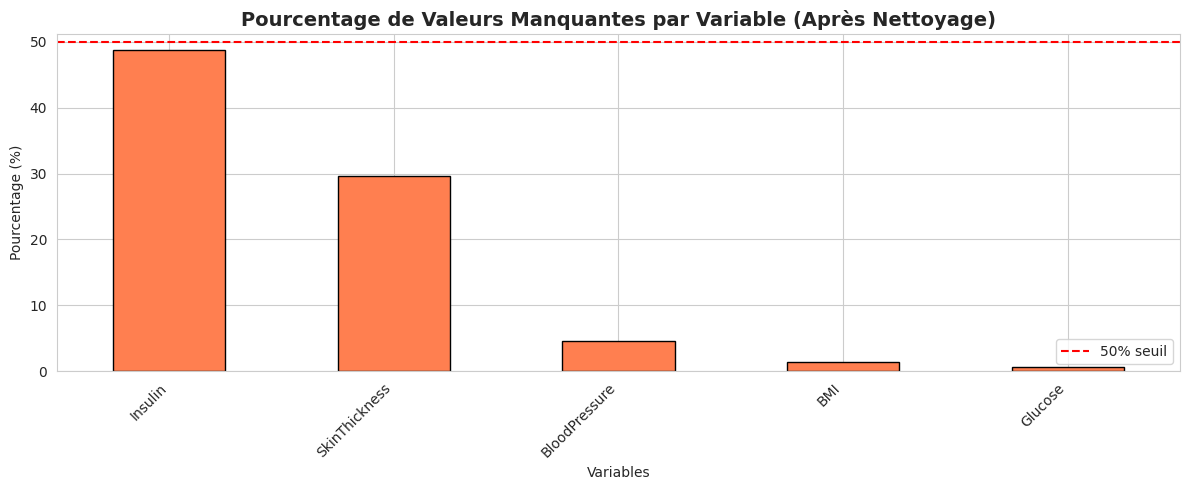


L'insuline a 48.7% de valeurs manquantes - forte proportion!


In [171]:
# Visualisation des valeurs manquantes après nettoyage
missing_cleaned = df_clean.isnull().sum()
missing_pct_cleaned = (missing_cleaned / len(df_clean) * 100).round(2)

missing_df = pd.DataFrame({
    'Colonne': df_clean.columns,
    'Valeurs_Manquantes': missing_cleaned,
    'Pourcentage': missing_pct_cleaned
})

print("="*80)
print("VALEURS MANQUANTES APRÈS NETTOYAGE")
print("="*80)
print(missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values('Valeurs_Manquantes', ascending=False))

# Visualisation
plt.figure(figsize=(12, 5))
missing_to_plot = missing_pct_cleaned[missing_pct_cleaned > 0].sort_values(ascending=False)
missing_to_plot.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Pourcentage de Valeurs Manquantes par Variable (Après Nettoyage)',
          fontsize=14, fontweight='bold')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=50, color='red', linestyle='--', label='50% seuil')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nL'insuline a {missing_pct_cleaned['Insulin']:.1f}% de valeurs manquantes - forte proportion!")

## 4. Analyse Exploratoire des Données (EDA Complète)

### 4.1 Analyse Univariée - Distributions

Analysons la distribution de chaque variable pour comprendre leur comportement individuel.

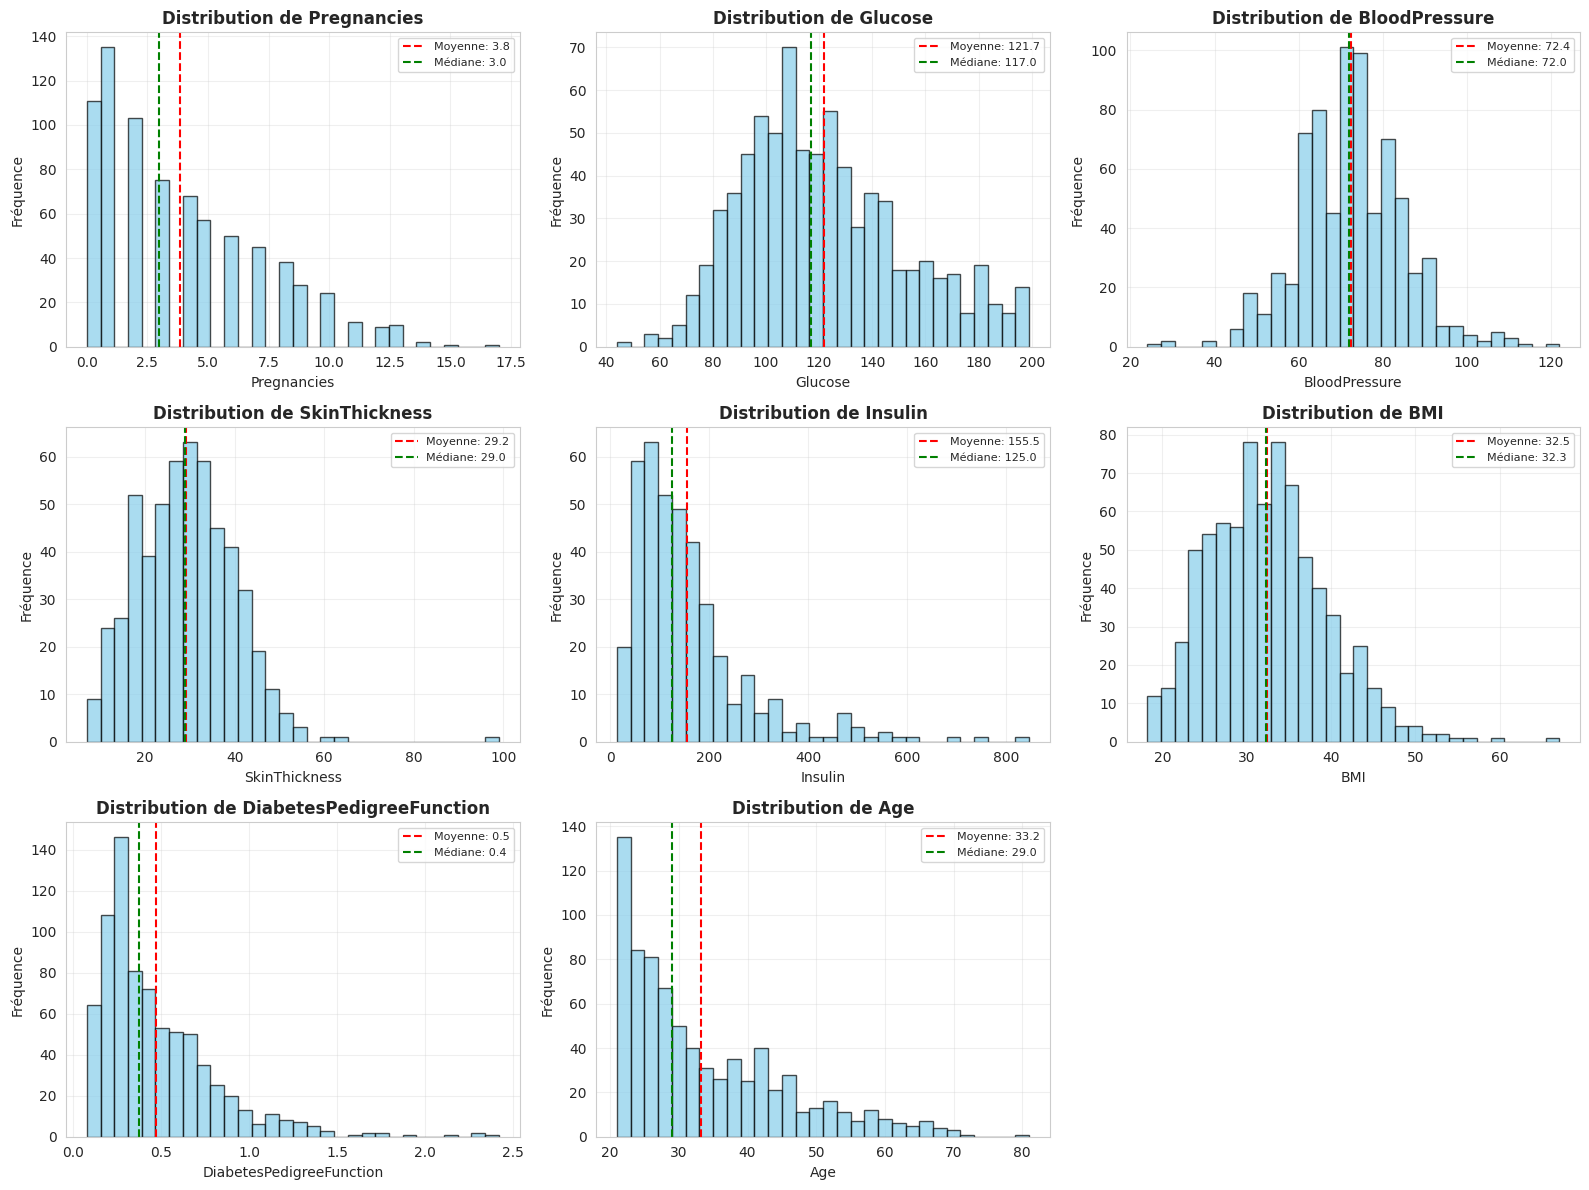

In [172]:
# Histogrammes de toutes les variables numériques
features = df_clean.columns.drop('Outcome')

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(features):
    axes[idx].hist(df_clean[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(alpha=0.3)

    # Ajout de statistiques
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Médiane: {median_val:.1f}')
    axes[idx].legend(fontsize=8)

# Supprimer le dernier subplot vide
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [173]:
# Analyse de l'asymétrie (skewness) et de l'aplatissement (kurtosis)
from scipy import stats

print("="*80)
print("ANALYSE DE L'ASYMÉTRIE ET DE L'APLATISSEMENT")
print("="*80)

skew_kurt_df = pd.DataFrame({
    'Variable': features,
    'Asymétrie (Skewness)': [df_clean[col].skew() for col in features],
    'Aplatissement (Kurtosis)': [df_clean[col].kurtosis() for col in features]
}).round(3)

print(skew_kurt_df.to_string(index=False))

print("\nInterprétation:")
print("- Skewness proche de 0 = distribution symétrique")
print("- Skewness > 0 = asymétrie à droite (queue à droite)")
print("- Skewness < 0 = asymétrie à gauche (queue à gauche)")
print("- Kurtosis > 0 = distribution pointue (plus concentrée)")
print("- Kurtosis < 0 = distribution plate (plus dispersée)")

ANALYSE DE L'ASYMÉTRIE ET DE L'APLATISSEMENT
                Variable  Asymétrie (Skewness)  Aplatissement (Kurtosis)
             Pregnancies                 0.902                     0.159
                 Glucose                 0.531                    -0.277
           BloodPressure                 0.134                     0.911
           SkinThickness                 0.691                     2.935
                 Insulin                 2.166                     6.371
                     BMI                 0.594                     0.863
DiabetesPedigreeFunction                 1.920                     5.595
                     Age                 1.130                     0.643

Interprétation:
- Skewness proche de 0 = distribution symétrique
- Skewness > 0 = asymétrie à droite (queue à droite)
- Skewness < 0 = asymétrie à gauche (queue à gauche)
- Kurtosis > 0 = distribution pointue (plus concentrée)
- Kurtosis < 0 = distribution plate (plus dispersée)


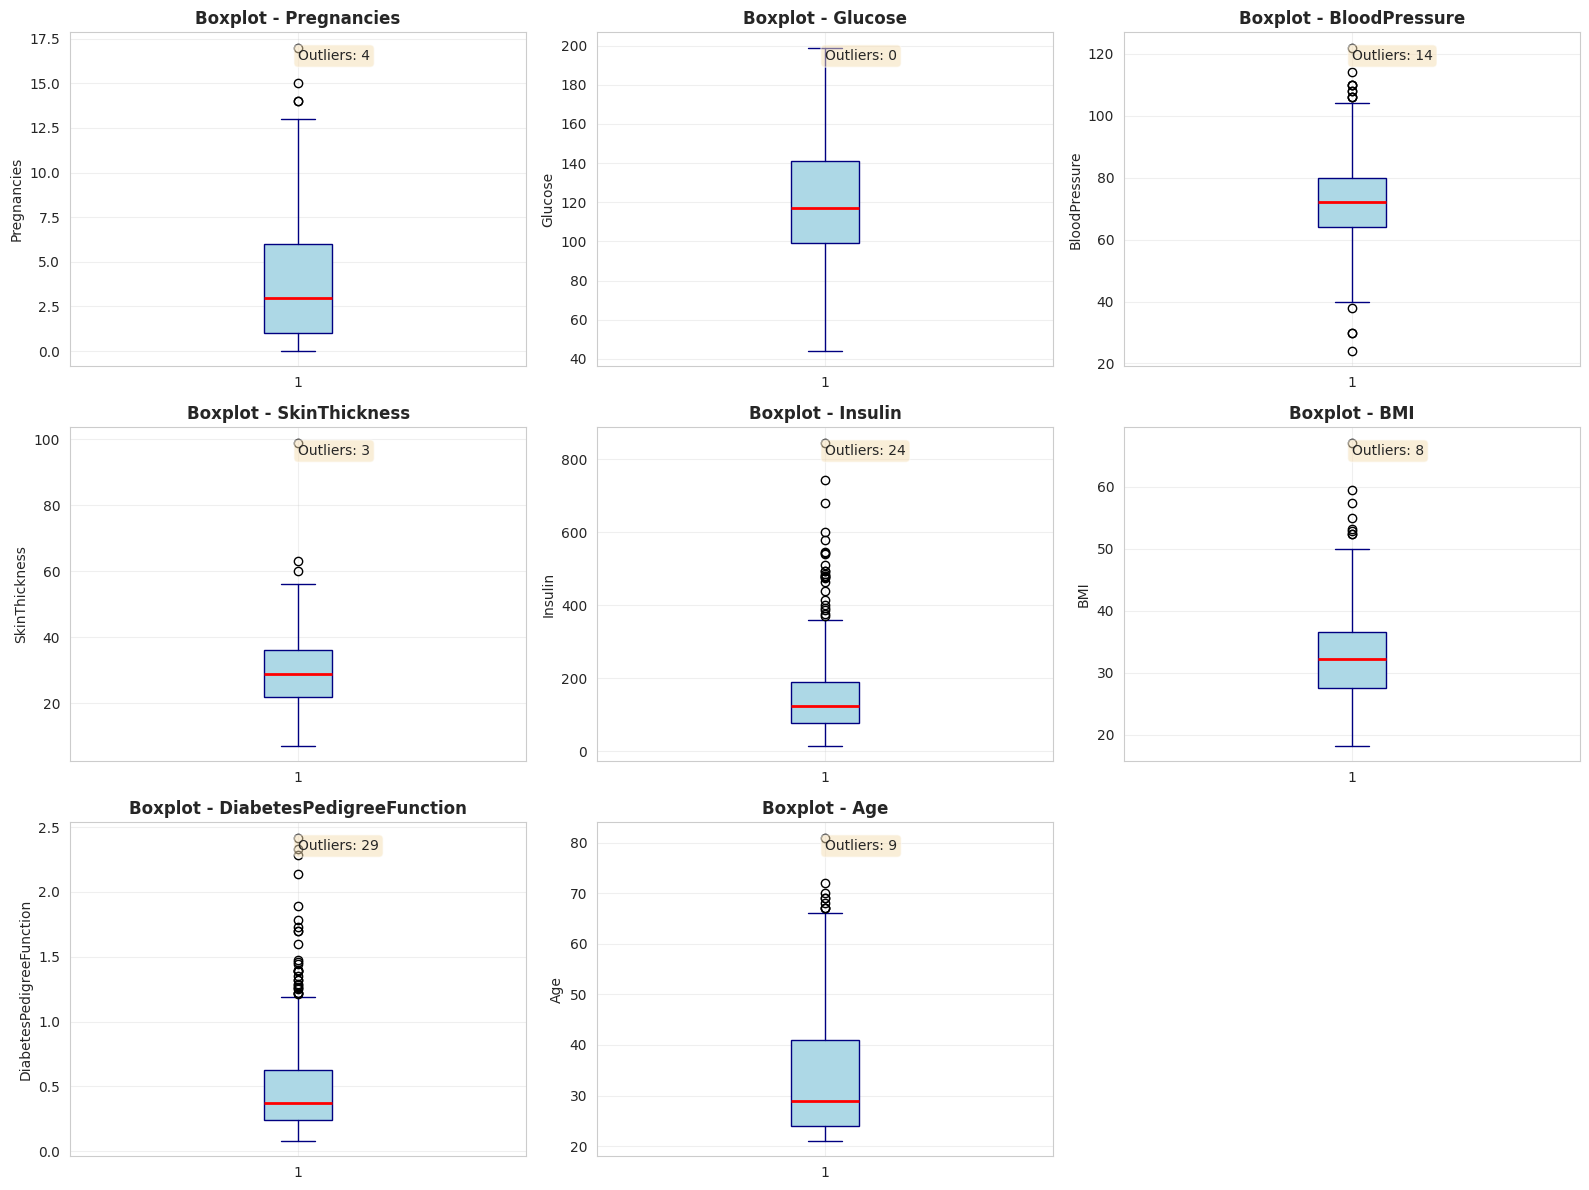

In [174]:
# Détection des outliers avec boxplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(features):
    bp = axes[idx].boxplot(df_clean[col].dropna(), vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', color='navy'),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='navy'),
                           capprops=dict(color='navy'))
    axes[idx].set_title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(alpha=0.3)

    # Calcul du nombre d'outliers
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_clean[(df_clean[col] < Q1 - 1.5*IQR) | (df_clean[col] > Q3 + 1.5*IQR)][col]
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)}',
                  transform=axes[idx].transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### 4.2 Analyse Bivariée - Relations avec la Variable Cible

Analysons comment chaque variable est liée au diabète.

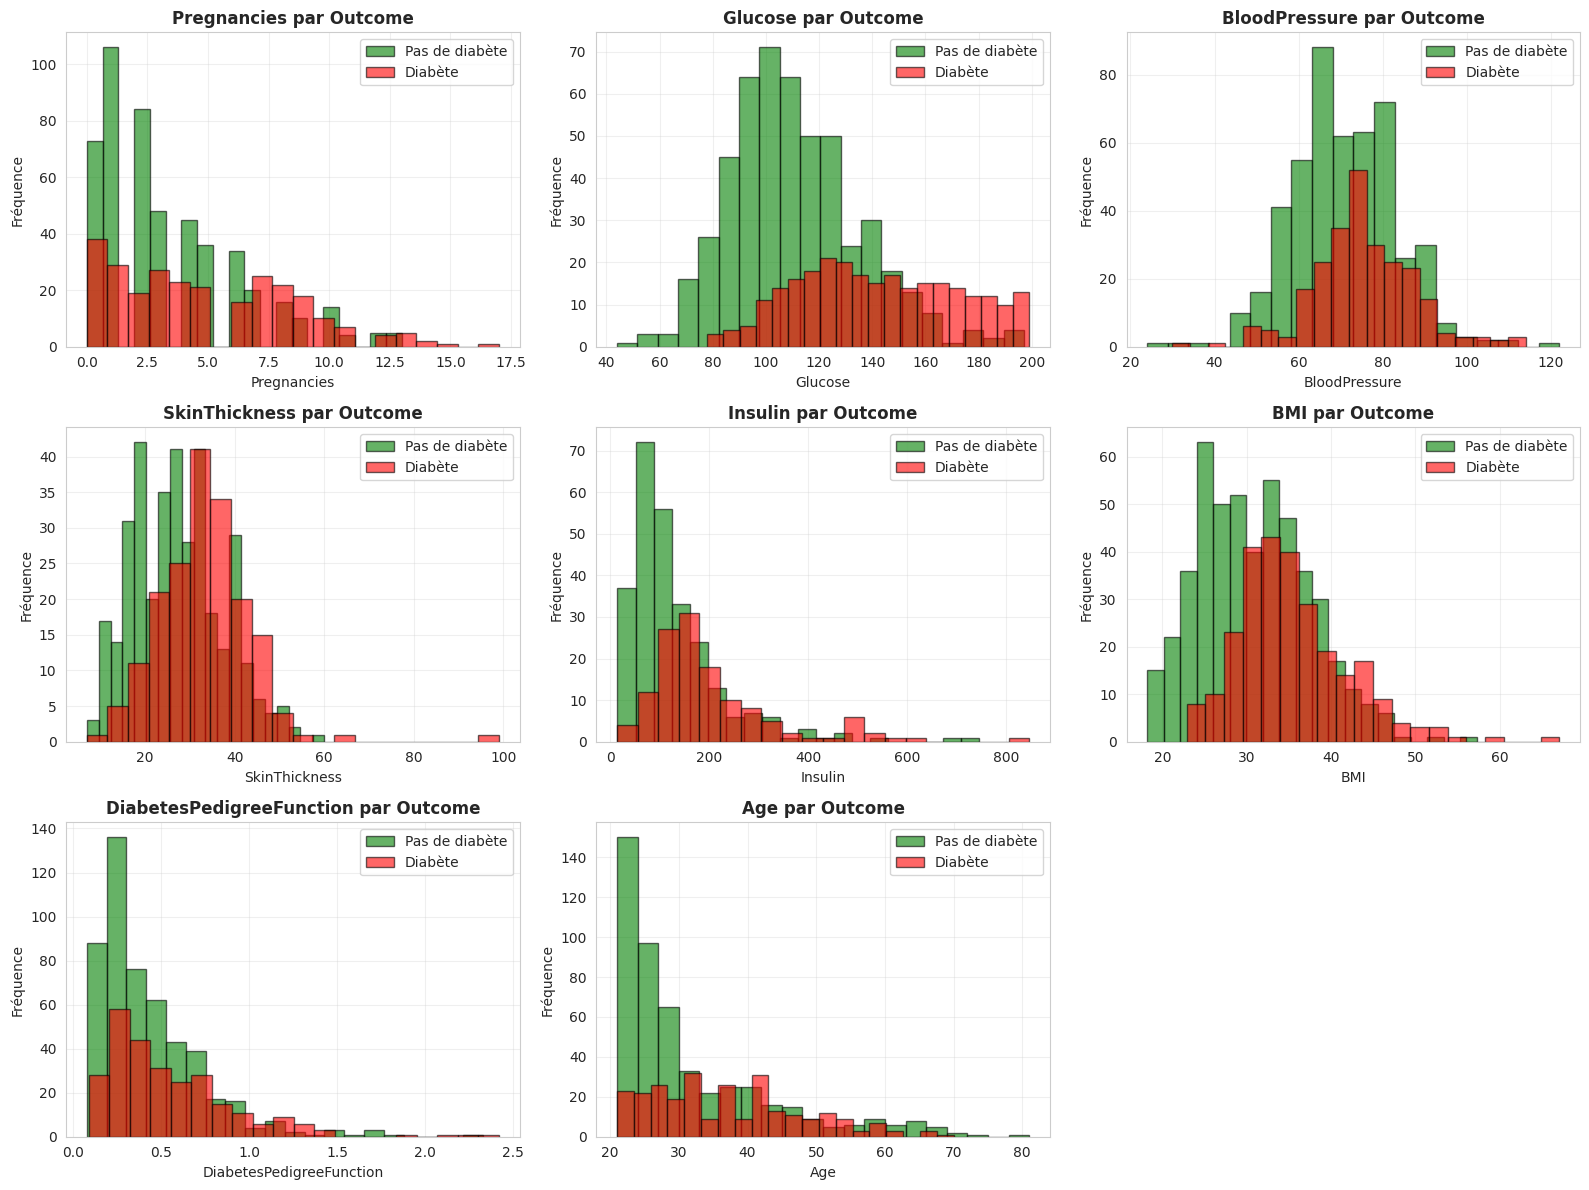

In [175]:
# Distributions des features par classe (Outcome)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(features):
    # Séparer les données par classe
    no_diabetes = df_clean[df_clean['Outcome'] == 0][col].dropna()
    diabetes = df_clean[df_clean['Outcome'] == 1][col].dropna()

    axes[idx].hist(no_diabetes, bins=20, alpha=0.6, label='Pas de diabète', color='green', edgecolor='black')
    axes[idx].hist(diabetes, bins=20, alpha=0.6, label='Diabète', color='red', edgecolor='black')
    axes[idx].set_title(f'{col} par Outcome', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

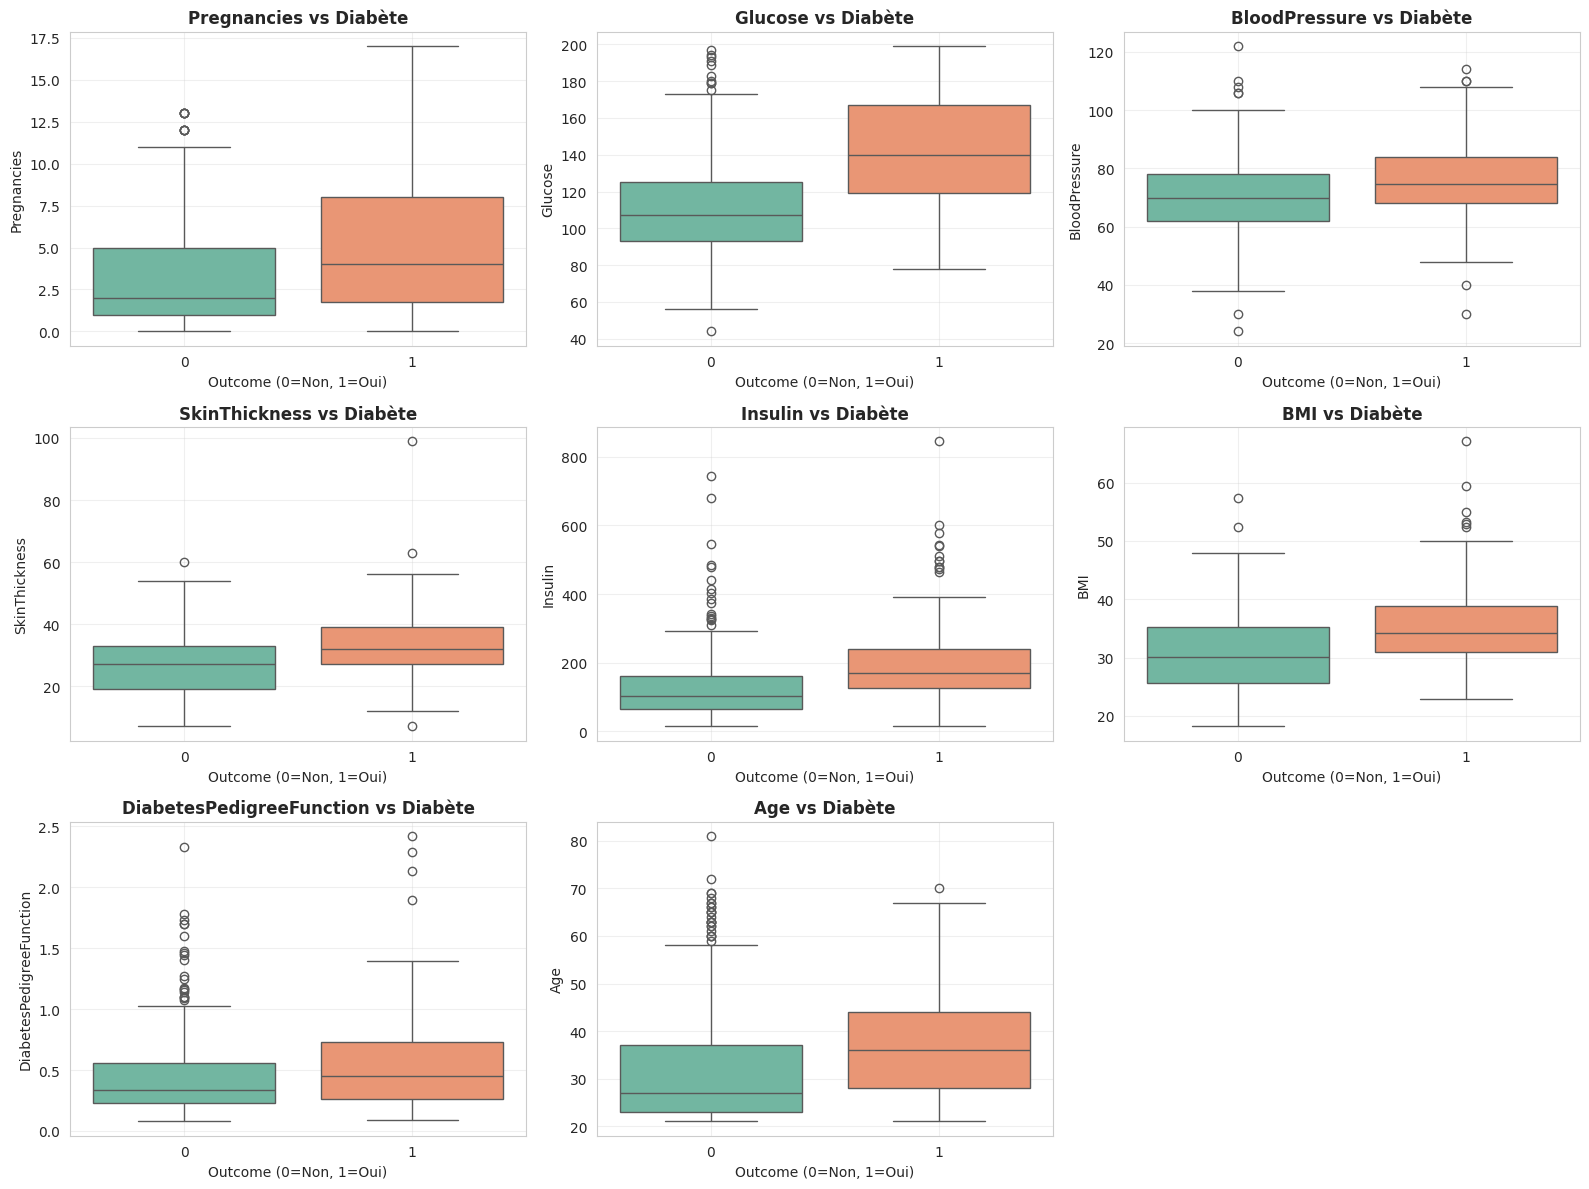

Observations clés:
- Glucose, BMI, Age semblent fortement corrélés avec le diabète
- Les patientes diabétiques ont généralement des valeurs plus élevées
- Pregnancies montre aussi une tendance positive


In [176]:
# Boxplots par classe pour mieux voir les différences
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(features):
    sns.boxplot(data=df_clean, x='Outcome', y=col, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Diabète', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Outcome (0=Non, 1=Oui)')
    axes[idx].grid(alpha=0.3)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

print("Observations clés:")
print("- Glucose, BMI, Age semblent fortement corrélés avec le diabète")
print("- Les patientes diabétiques ont généralement des valeurs plus élevées")
print("- Pregnancies montre aussi une tendance positive")

### 4.3 Analyse Multivariée - Matrice de Corrélation

Analysons les corrélations entre variables pour identifier les relations et les multicolinéarités potentielles.

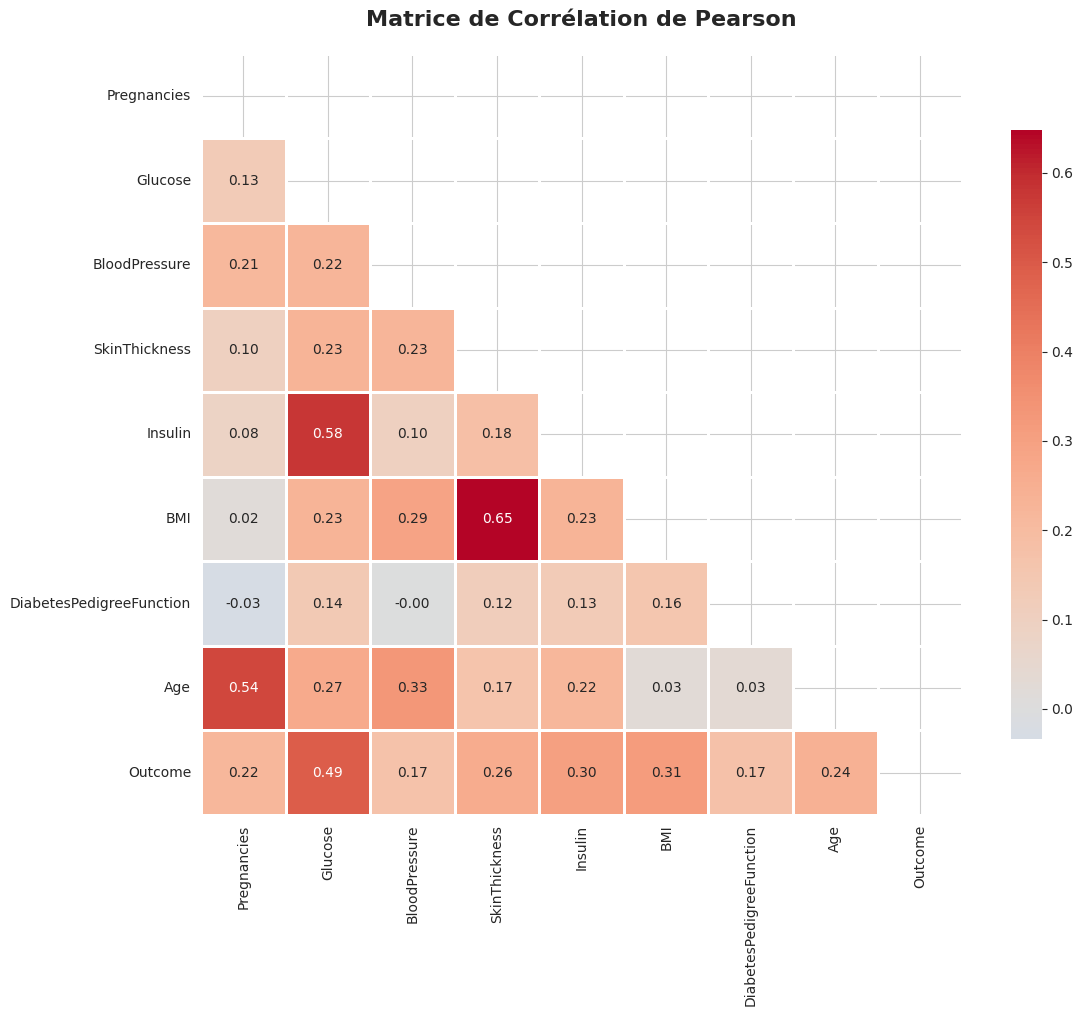

CORRÉLATIONS AVEC LA VARIABLE CIBLE (Outcome)
Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589

Variables les plus corrélées avec le diabète:
   1. Glucose: 0.495
   2. BMI: 0.314
   3. Age: 0.238


In [177]:
# Matrice de corrélation
correlation_matrix = df_clean.corr()

# Visualisation avec heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation de Pearson', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Corrélations avec la variable cible
print("="*80)
print("CORRÉLATIONS AVEC LA VARIABLE CIBLE (Outcome)")
print("="*80)
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
print(outcome_corr.to_string())

print("\nVariables les plus corrélées avec le diabète:")
print(f"   1. Glucose: {outcome_corr['Glucose']:.3f}")
print(f"   2. BMI: {outcome_corr['BMI']:.3f}")
print(f"   3. Age: {outcome_corr['Age']:.3f}")

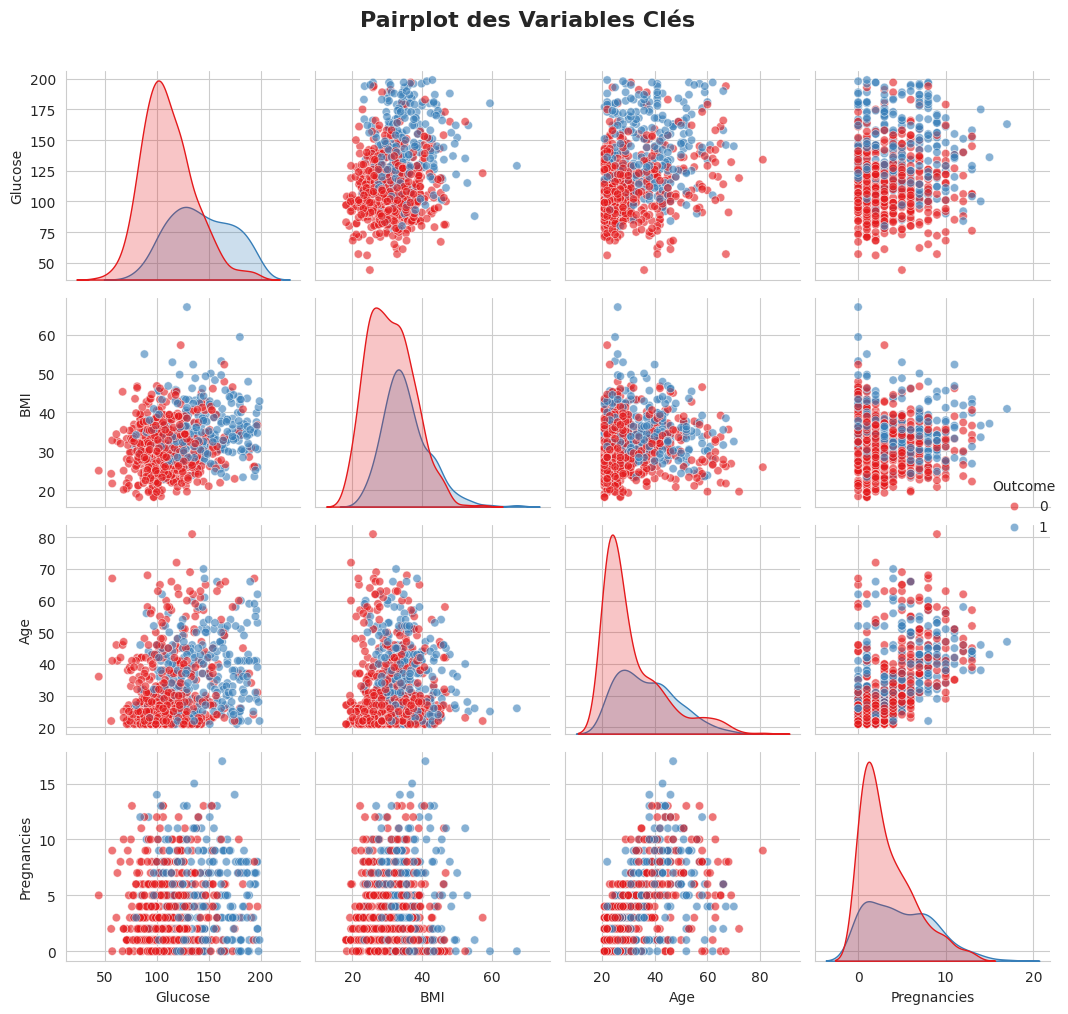

In [178]:
# Pairplot pour les variables les plus importantes
important_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']
sns.pairplot(df_clean[important_features].dropna(), hue='Outcome', palette='Set1',
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot des Variables Clés', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.4 Insights Clés de l'EDA

**Observations Principales:**

1. **Variables les plus prédictives:**
   - **Glucose**: Forte corrélation (>0.4) avec le diabète - variable la plus importante
   - **BMI**: Corrélation modérée - l'obésité est un facteur de risque
   - **Age**: Corrélation positive - le risque augmente avec l'âge
   - **Pregnancies**: Corrélation faible mais présente

2. **Qualité des données:**
   - Insulin a ~48% de valeurs manquantes - utilisation prudente
   - SkinThickness a ~30% de valeurs manquantes
   - Pas de valeurs manquantes dans Glucose (variable critique)

3. **Distribution des données:**
   - Dataset légèrement déséquilibré (65% non-diabète, 35% diabète)
   - Plusieurs variables montrent une asymétrie (Insulin, DiabetesPedigreeFunction)
   - Présence d'outliers dans plusieurs variables

4. **Multicolinéarité:**
   - Pas de forte multicolinéarité détectée
   - Les variables sont relativement indépendantes

**Impact sur la Modélisation:**
- L'imputation des valeurs manquantes est cruciale
- Le scaling sera nécessaire (échelles différentes)
- Le déséquilibre des classes devra être pris en compte
- Glucose, BMI et Age seront probablement les features les plus importantes dans les modèles

## 5. Préparation des Données pour la Modélisation

Création du pipeline de prétraitement pour éviter le data leakage et assurer la reproductibilité.

In [179]:
# Import des bibliothèques de modélisation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modèles de classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Métriques d'évaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

In [180]:
# Séparation features / target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nDistribution de y:\n{y.value_counts()}")

# Split train/test stratifié (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"\n Split effectué avec succès:")
print(f"  - Train: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Test:  {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nDistribution dans le train set:")
print(y_train.value_counts(normalize=True))

Features (X): (768, 8)
Target (y): (768,)

Distribution de y:
Outcome
0    500
1    268
Name: count, dtype: int64

 Split effectué avec succès:
  - Train: 614 échantillons (79.9%)
  - Test:  154 échantillons (20.1%)

Distribution dans le train set:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64


In [181]:
# Création du pipeline de prétraitement
# Imputation par la médiane + Scaling

preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

print(" Pipeline de prétraitement créé:")
print("  1. Imputation des valeurs manquantes (médiane)")
print("  2. Standardisation (StandardScaler)")
print("\n Pipeline appliqué dans les modèles pour éviter le data leakage")

 Pipeline de prétraitement créé:
  1. Imputation des valeurs manquantes (médiane)
  2. Standardisation (StandardScaler)

 Pipeline appliqué dans les modèles pour éviter le data leakage


## 6. Modélisation - Entraînement de Plusieurs Modèles

Entrainement et comparaisons de  **4 modèles de classification** différents:

1. **Régression Logistique**
2. **Random Forest**
3. **Gradient Boosting**
4. **Support Vector Machine (SVM)**

### 6.1 Modèle 1: Régression Logistique

**Description:** Modèle linéaire qui prédit la probabilité d'appartenance à une classe en utilisant la fonction logistique (sigmoïde).

**Choix:** Simple, interprétable, performant comme baseline. Fonctionne bien quand les classes sont linéairement séparables.

**Hypothèses:** Les features doivent être relativement indépendantes (pas de forte multicolinéarité).

In [182]:
# Modèle 1: Régression Logistique
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

# Entraînement
lr_pipeline.fit(X_train, y_train)

# Prédictions
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

print("="*80)
print("RÉGRESSION LOGISTIQUE - RÉSULTATS")
print("="*80)
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"AUC-ROC:   {lr_auc:.4f}")
print("\n" + classification_report(y_test, y_pred_lr, target_names=['Pas de diabète', 'Diabète']))

# Validation croisée
cv_scores_lr = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Validation Croisée (AUC) - Mean: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

RÉGRESSION LOGISTIQUE - RÉSULTATS
Accuracy:  0.7078
Precision: 0.6000
Recall:    0.5000
F1-Score:  0.5455
AUC-ROC:   0.8130

                precision    recall  f1-score   support

Pas de diabète       0.75      0.82      0.78       100
       Diabète       0.60      0.50      0.55        54

      accuracy                           0.71       154
     macro avg       0.68      0.66      0.67       154
  weighted avg       0.70      0.71      0.70       154

Validation Croisée (AUC) - Mean: 0.8430 (+/- 0.0291)


### 6.2 Modèle 2: Random Forest

**Description:** Ensemble de nombreux arbres de décision entraînés sur des sous-échantillons aléatoires. Chaque arbre vote et la classe majoritaire est sélectionnée.

**Choix:** Robuste aux outliers et aux non-linéarités. Gère bien les interactions entre variables. Pas besoin d'hypothèses strictes.

**Avantages:** Réduit le surapprentissage grâce au bagging. Fournit l'importance des variables.

In [183]:
# Modèle 2: Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100))
])

# Entraînement
rf_pipeline.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_proba_rf)

print("="*80)
print("RANDOM FOREST - RÉSULTATS")
print("="*80)
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"AUC-ROC:   {rf_auc:.4f}")
print("\n" + classification_report(y_test, y_pred_rf, target_names=['Pas de diabète', 'Diabète']))

# Validation croisée
cv_scores_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Validation Croisée (AUC) - Mean: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

RANDOM FOREST - RÉSULTATS
Accuracy:  0.7727
Precision: 0.7021
Recall:    0.6111
F1-Score:  0.6535
AUC-ROC:   0.8181

                precision    recall  f1-score   support

Pas de diabète       0.80      0.86      0.83       100
       Diabète       0.70      0.61      0.65        54

      accuracy                           0.77       154
     macro avg       0.75      0.74      0.74       154
  weighted avg       0.77      0.77      0.77       154

Validation Croisée (AUC) - Mean: 0.8231 (+/- 0.0237)


### 6.3 Modèle 3: Gradient Boosting

**Description:** Construit séquentiellement des arbres de décision où chaque nouvel arbre corrige les erreurs du précédent. Les prédictions finales sont une combinaison pondérée de tous les arbres.

**Choix:** Généralement très performant, excellent pouvoir prédictif. Capture bien les interactions complexes.

**Caractéristiques:** Apprentissage séquentiel (boosting). Sensible aux hyperparamètres mais très puissant quand bien configuré.

In [184]:
# Modèle 3: Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100))
])

# Entraînement
gb_pipeline.fit(X_train, y_train)

# Prédictions
y_pred_gb = gb_pipeline.predict(X_test)
y_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_proba_gb)

print("="*80)
print("GRADIENT BOOSTING - RÉSULTATS")
print("="*80)
print(f"Accuracy:  {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall:    {gb_recall:.4f}")
print(f"F1-Score:  {gb_f1:.4f}")
print(f"AUC-ROC:   {gb_auc:.4f}")
print("\n" + classification_report(y_test, y_pred_gb, target_names=['Pas de diabète', 'Diabète']))

# Validation croisée
cv_scores_gb = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Validation Croisée (AUC) - Mean: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std():.4f})")

GRADIENT BOOSTING - RÉSULTATS
Accuracy:  0.7597
Precision: 0.6889
Recall:    0.5741
F1-Score:  0.6263
AUC-ROC:   0.8306

                precision    recall  f1-score   support

Pas de diabète       0.79      0.86      0.82       100
       Diabète       0.69      0.57      0.63        54

      accuracy                           0.76       154
     macro avg       0.74      0.72      0.72       154
  weighted avg       0.75      0.76      0.75       154

Validation Croisée (AUC) - Mean: 0.8126 (+/- 0.0286)


### 6.4 Modèle 4: Support Vector Machine (SVM)

**Description:** Trouve l'hyperplan optimal qui sépare les classes avec la marge maximale. Utilise le kernel trick pour gérer les problèmes non-linéaires.

**Choix:** Efficace en haute dimension. Le kernel RBF permet de capturer des relations non-linéaires complexes.

**Caractéristiques:** Sensible au scaling (déjà fait). Performant avec des données de taille moyenne.

In [185]:
# Modèle 4: Support Vector Machine (SVM)
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=RANDOM_STATE, probability=True, kernel='rbf'))
])

# Entraînement
svm_pipeline.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Évaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_proba_svm)

print("="*80)
print("SUPPORT VECTOR MACHINE (SVM) - RÉSULTATS")
print("="*80)
print(f"Accuracy:  {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")
print(f"AUC-ROC:   {svm_auc:.4f}")
print("\n" + classification_report(y_test, y_pred_svm, target_names=['Pas de diabète', 'Diabète']))

# Validation croisée
cv_scores_svm = cross_val_score(svm_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Validation Croisée (AUC) - Mean: {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std():.4f})")

SUPPORT VECTOR MACHINE (SVM) - RÉSULTATS
Accuracy:  0.7403
Precision: 0.6522
Recall:    0.5556
F1-Score:  0.6000
AUC-ROC:   0.7964

                precision    recall  f1-score   support

Pas de diabète       0.78      0.84      0.81       100
       Diabète       0.65      0.56      0.60        54

      accuracy                           0.74       154
     macro avg       0.71      0.70      0.70       154
  weighted avg       0.73      0.74      0.73       154

Validation Croisée (AUC) - Mean: 0.8258 (+/- 0.0240)


### 6.5 Comparaison des Modèles Baseline

Comparons les performances de tous les modèles avant optimisation des hyperparamètres.

TABLEAU COMPARATIF DES MODÈLES (BASELINE)


,Modèle,Accuracy,Precision,Recall,F1-Score,AUC-ROC,CV_AUC_Mean,CV_AUC_Std
2,Gradient Boosting,0.7597,0.6889,0.5741,0.6263,0.8306,0.8126,0.0286
1,Random Forest,0.7727,0.7021,0.6111,0.6535,0.8181,0.8231,0.0237
0,Logistic Regression,0.7078,0.6000,0.5000,0.5455,0.8130,0.8430,0.0291
3,SVM,0.7403,0.6522,0.5556,0.6000,0.7964,0.8258,0.0240


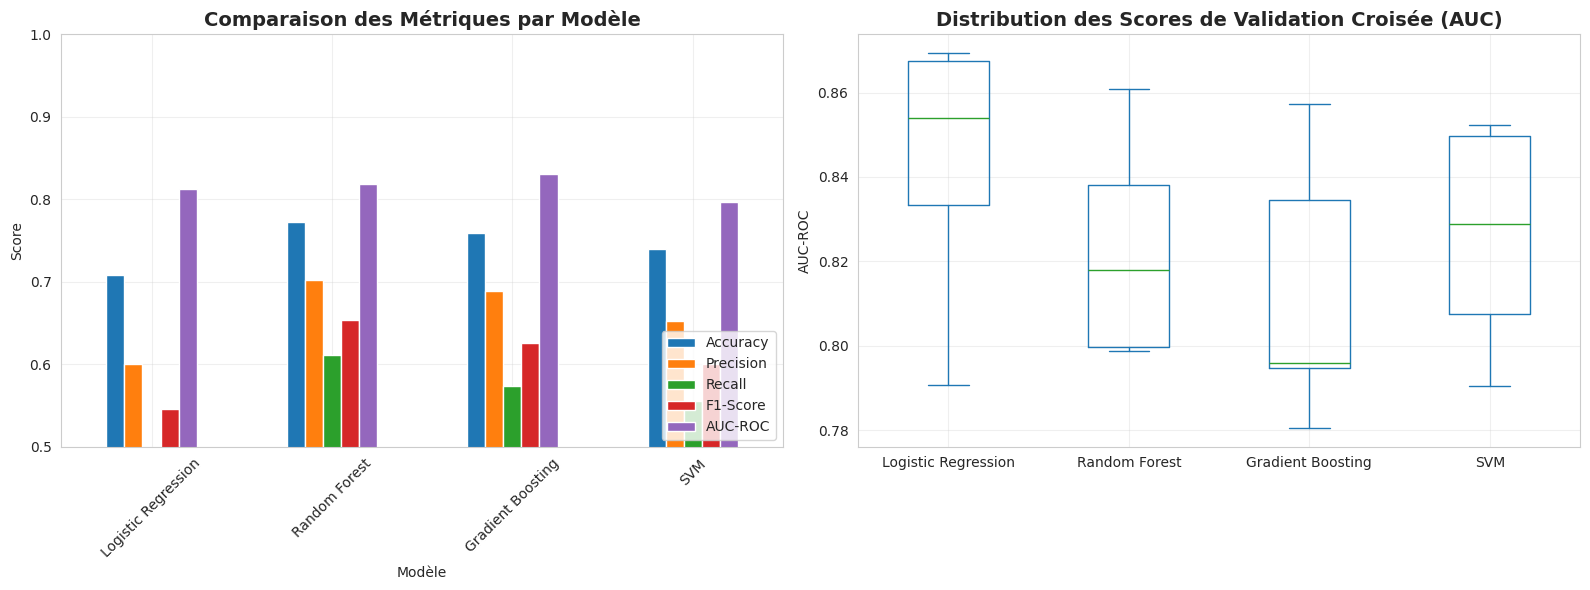


 Meilleur modèle (baseline): Gradient Boosting


In [186]:
# Tableau comparatif des modèles
results_baseline = pd.DataFrame({
    'Modèle': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [lr_accuracy, rf_accuracy, gb_accuracy, svm_accuracy],
    'Precision': [lr_precision, rf_precision, gb_precision, svm_precision],
    'Recall': [lr_recall, rf_recall, gb_recall, svm_recall],
    'F1-Score': [lr_f1, rf_f1, gb_f1, svm_f1],
    'AUC-ROC': [lr_auc, rf_auc, gb_auc, svm_auc],
    'CV_AUC_Mean': [cv_scores_lr.mean(), cv_scores_rf.mean(), cv_scores_gb.mean(), cv_scores_svm.mean()],
    'CV_AUC_Std': [cv_scores_lr.std(), cv_scores_rf.std(), cv_scores_gb.std(), cv_scores_svm.std()]
})

print("="*100)
print("TABLEAU COMPARATIF DES MODÈLES (BASELINE)")
print("="*100)
display(results_baseline.round(4).sort_values('AUC-ROC', ascending=False))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Comparaison des métriques
results_baseline.set_index('Modèle')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].plot(
    kind='bar', ax=axes[0], rot=45)
axes[0].set_title('Comparaison des Métriques par Modèle', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)
axes[0].set_ylim([0.5, 1.0])

# Validation croisée
cv_data = pd.DataFrame({
    'Logistic Regression': cv_scores_lr,
    'Random Forest': cv_scores_rf,
    'Gradient Boosting': cv_scores_gb,
    'SVM': cv_scores_svm
})
cv_data.plot(kind='box', ax=axes[1])
axes[1].set_title('Distribution des Scores de Validation Croisée (AUC)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('AUC-ROC')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Meilleur modèle (baseline): {results_baseline.loc[results_baseline['AUC-ROC'].idxmax(), 'Modèle']}")

## 7. Importance des Variables et Analyse d'Erreurs

### 7.1 Importance des Variables

Analysons quelles variables sont les plus importantes pour la prédiction.

IMPORTANCE DES VARIABLES - RANDOM FOREST
                 Feature  Importance
                 Glucose    0.272616
                     BMI    0.163688
DiabetesPedigreeFunction    0.124927
                     Age    0.113057
                 Insulin    0.089395
           BloodPressure    0.084337
             Pregnancies    0.080793
           SkinThickness    0.071187


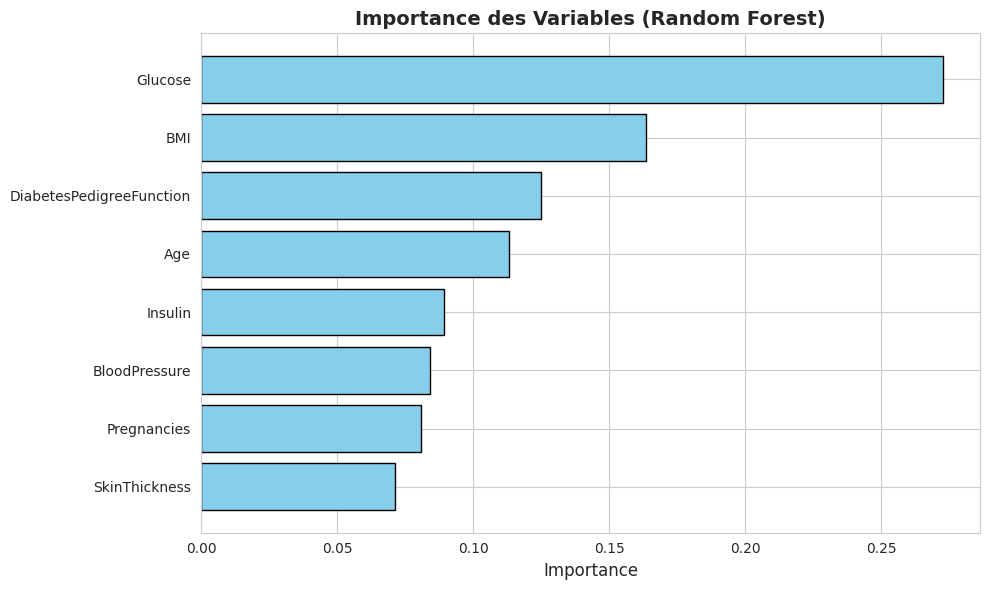


💡 Les 3 variables les plus importantes:
   1. Glucose: 0.2726
   2. BMI: 0.1637
   3. DiabetesPedigreeFunction: 0.1249


In [187]:
# Importance des features pour Random Forest
feature_importance_rf = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_rf
}).sort_values('Importance', ascending=False)

print("="*80)
print("IMPORTANCE DES VARIABLES - RANDOM FOREST")
print("="*80)
print(importance_df_rf.to_string(index=False))

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.title('Importance des Variables (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 Les 3 variables les plus importantes:")
for i in range(3):
    print(f"   {i+1}. {importance_df_rf.iloc[i]['Feature']}: {importance_df_rf.iloc[i]['Importance']:.4f}")

COEFFICIENTS - RÉGRESSION LOGISTIQUE
                 Feature  Coefficient
                 Glucose     1.182567
                     BMI     0.688652
             Pregnancies     0.377446
DiabetesPedigreeFunction     0.233337
                     Age     0.147794
                 Insulin    -0.066119
           BloodPressure    -0.044111
           SkinThickness     0.028321


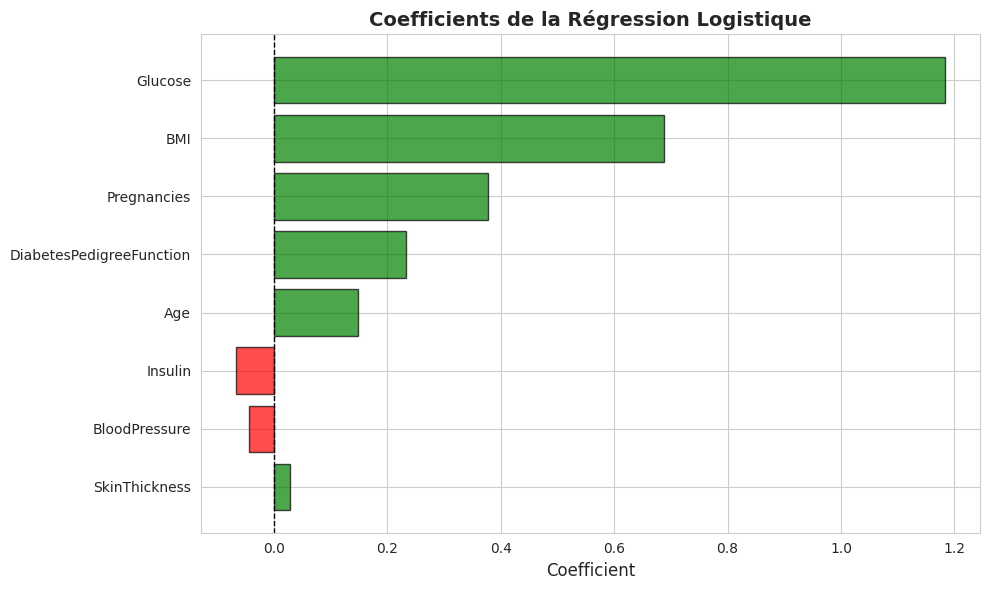


💡 Interprétation:
   - Coefficients positifs -> augmentent la probabilité de diabète
   - Coefficients négatifs -> diminuent la probabilité de diabète


In [188]:
# Coefficients pour la Régression Logistique
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_coefficients,
    'Abs_Coefficient': np.abs(lr_coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("="*80)
print("COEFFICIENTS - RÉGRESSION LOGISTIQUE")
print("="*80)
print(coef_df[['Feature', 'Coefficient']].to_string(index=False))

# Visualisation
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Coefficient', fontsize=12)
plt.title('Coefficients de la Régression Logistique', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 Interprétation:")
print("   - Coefficients positifs -> augmentent la probabilité de diabète")
print("   - Coefficients négatifs -> diminuent la probabilité de diabète")

### 7.2 Analyse d'Erreurs - Matrices de Confusion

## 8 Optimisation des Hyperparamètres

Utilisons GridSearchCV pour optimiser les hyperparamètres du meilleur modèle (ou des 2-3 meilleurs).

### 8.1 Optimisation de Random Forest

In [189]:
# Espace de recherche pour Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

print("="*80)
print("OPTIMISATION DES HYPERPARAMÈTRES - RANDOM FOREST")
print("="*80)
print(f"Espace de recherche: {sum([len(v) for v in param_grid_rf.values()])} paramètres")
print(f"Nombre total de combinaisons: {np.prod([len(v) for v in param_grid_rf.values()])}")

# GridSearchCV avec validation croisée
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("\n Recherche en cours (cela peut prendre quelques minutes)...")
grid_search_rf.fit(X_train, y_train)

print("\n Optimisation terminée!")
print(f"Meilleurs hyperparamètres: {grid_search_rf.best_params_}")
print(f"Meilleur score CV (AUC): {grid_search_rf.best_score_:.4f}")

OPTIMISATION DES HYPERPARAMÈTRES - RANDOM FOREST
Espace de recherche: 15 paramètres
Nombre total de combinaisons: 216

 Recherche en cours (cela peut prendre quelques minutes)...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

 Optimisation terminée!
Meilleurs hyperparamètres: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Meilleur score CV (AUC): 0.8364


In [190]:
# Évaluation du modèle optimisé
best_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
rf_tuned_precision = precision_score(y_test, y_pred_rf_tuned)
rf_tuned_recall = recall_score(y_test, y_pred_rf_tuned)
rf_tuned_f1 = f1_score(y_test, y_pred_rf_tuned)
rf_tuned_auc = roc_auc_score(y_test, y_proba_rf_tuned)

print("="*80)
print("RANDOM FOREST OPTIMISÉ - RÉSULTATS")
print("="*80)
print(f"Accuracy:  {rf_tuned_accuracy:.4f}")
print(f"Precision: {rf_tuned_precision:.4f}")
print(f"Recall:    {rf_tuned_recall:.4f}")
print(f"F1-Score:  {rf_tuned_f1:.4f}")
print(f"AUC-ROC:   {rf_tuned_auc:.4f}")

print("\n" + "="*80)
print("COMPARAISON BASELINE vs TUNED")
print("="*80)
comparison = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Baseline': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc],
    'Tuned': [rf_tuned_accuracy, rf_tuned_precision, rf_tuned_recall, rf_tuned_f1, rf_tuned_auc],
    'Gain': [rf_tuned_accuracy-rf_accuracy, rf_tuned_precision-rf_precision,
             rf_tuned_recall-rf_recall, rf_tuned_f1-rf_f1, rf_tuned_auc-rf_auc]
})
display(comparison.round(4))

RANDOM FOREST OPTIMISÉ - RÉSULTATS
Accuracy:  0.7403
Precision: 0.6667
Recall:    0.5185
F1-Score:  0.5833
AUC-ROC:   0.8148

COMPARAISON BASELINE vs TUNED


,Métrique,Baseline,Tuned,Gain
0,Accuracy,0.7727,0.7403,-0.0325
1,Precision,0.7021,0.6667,-0.0355
2,Recall,0.6111,0.5185,-0.0926
3,F1-Score,0.6535,0.5833,-0.0701
4,AUC-ROC,0.8181,0.8148,-0.0032


from matplotlib import pyplot as plt
_df_0['Baseline'].plot(kind='hist', bins=20, title='Baseline')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Tuned'].plot(kind='hist', bins=20, title='Tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Gain'].plot(kind='hist', bins=20, title='Gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Métrique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Baseline', y='Tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Tuned', y='Gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Baseline'].plot(kind='line', figsize=(8, 4), title='Baseline')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Tuned'].plot(kind='line', figsize=(8, 4), title='Tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Gain'].plot(kind='line', figsize=(8, 4), title='Gain')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Baseline', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Tuned', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Gain', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Baseline'].plot(kind='hist', bins=20, title='Baseline')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Tuned'].plot(kind='hist', bins=20, title='Tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Gain'].plot(kind='hist', bins=20, title='Gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Métrique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='index', y='Baseline', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Baseline', y='Tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Tuned', y='Gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Baseline']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Métrique')):
  _plot_series(series, series_name, i)
  fig.legend(title='Métrique', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Baseline')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Tuned']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Métrique')):
  _plot_series(series, series_name, i)
  fig.legend(title='Métrique', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Tuned')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Gain']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Métrique')):
  _plot_series(series, series_name, i)
  fig.legend(title='Métrique', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Gain')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Métrique')):
  _plot_series(series, series_name, i)
  fig.legend(title='Métrique', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Baseline'].plot(kind='line', figsize=(8, 4), title='Baseline')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Tuned'].plot(kind='line', figsize=(8, 4), title='Tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Gain'].plot(kind='line', figsize=(8, 4), title='Gain')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Baseline', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Tuned', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Métrique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Gain', y='Métrique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)